<a href="https://colab.research.google.com/github/pravanjangarg20/Machine_Learning_project/blob/main/Black_Friday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [ ]:
df.shape

(550068, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,173638


Data Visulization

<ipython-input-40-f53c45f3689e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Gender',palette='mako')


<Axes: xlabel='Gender', ylabel='count'>

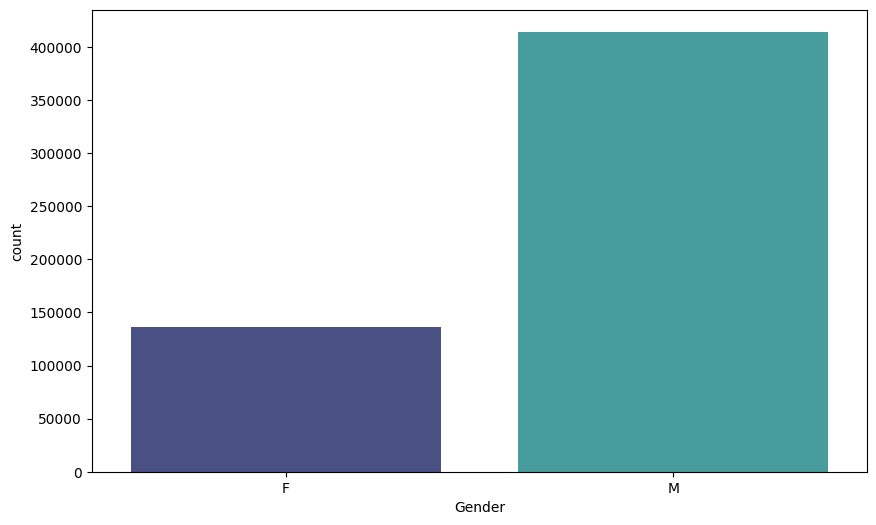

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Gender',palette='mako')

<Axes: xlabel='Gender', ylabel='Marital_Status'>

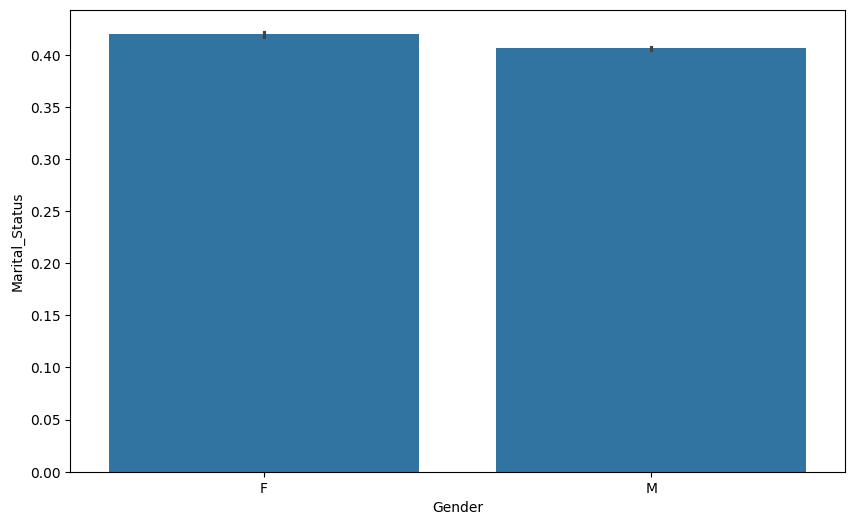

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Gender',y='Marital_Status')

<Axes: xlabel='Gender', ylabel='Purchase'>

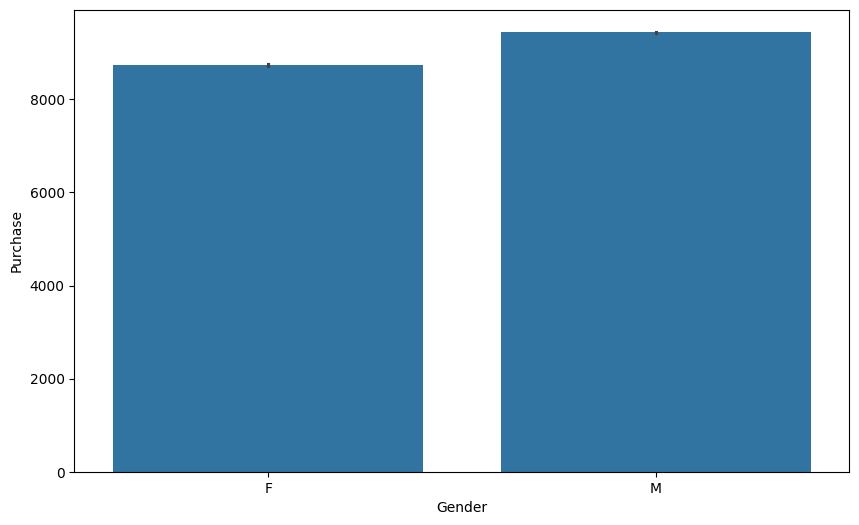

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Gender',y='Purchase')

<Axes: xlabel='Occupation', ylabel='Purchase'>

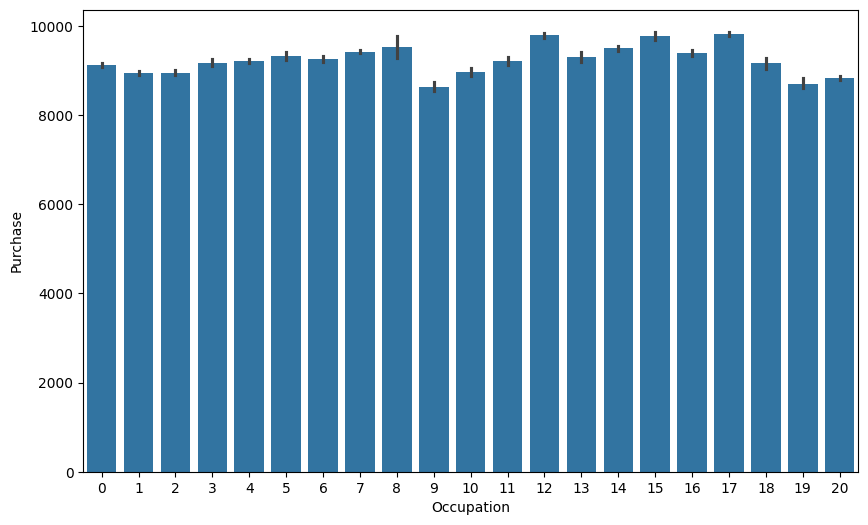

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Occupation',y='Purchase')

<Axes: xlabel='Occupation', ylabel='Purchase'>

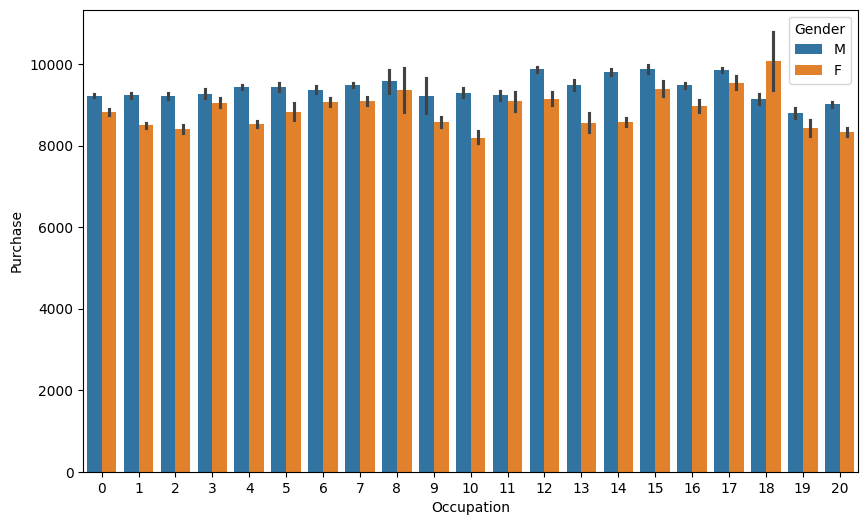

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Occupation',y='Purchase',hue='Gender')

<Axes: xlabel='Gender', ylabel='Purchase'>

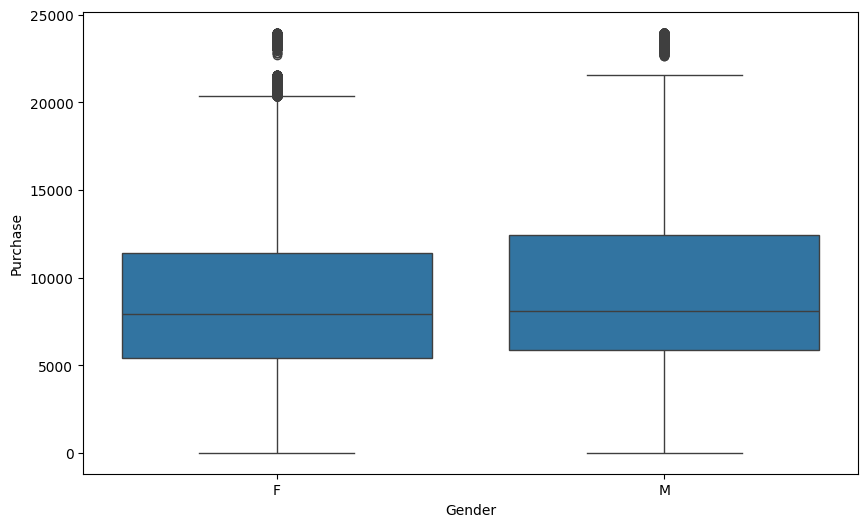

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Gender',y='Purchase')

<Axes: xlabel='Occupation', ylabel='Purchase'>

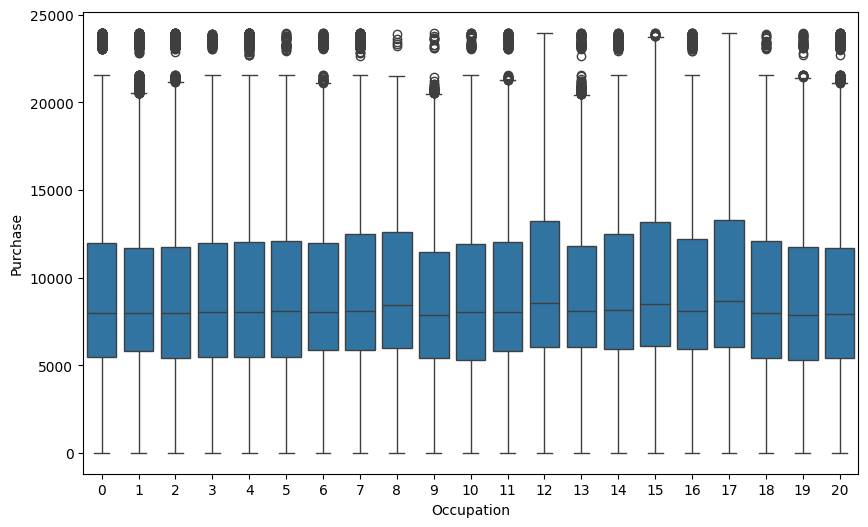

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Occupation',y='Purchase')

<Axes: xlabel='Age', ylabel='Purchase'>

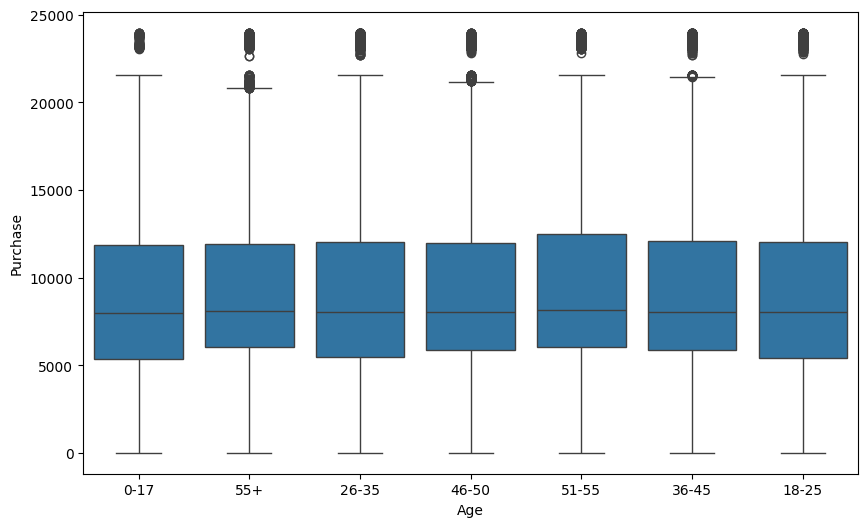

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Age',y='Purchase')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

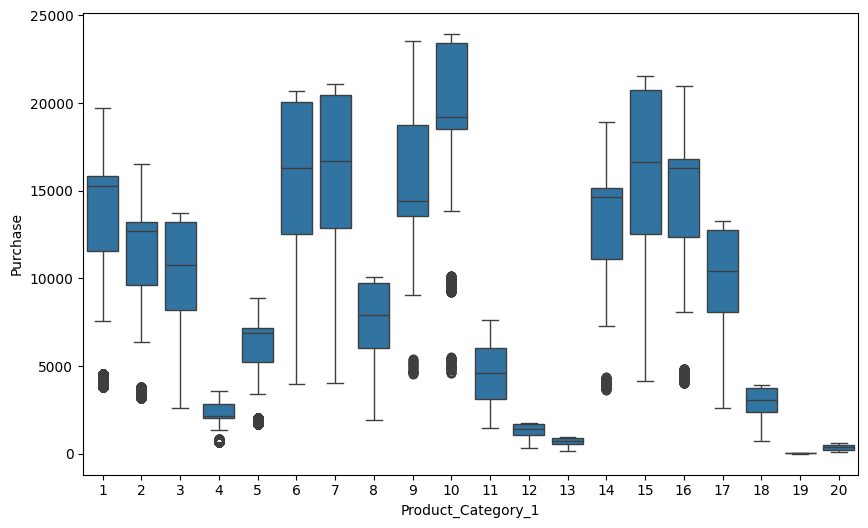

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='Product_Category_1',y='Purchase')

Data Preprocessing

In [ ]:
df['Product_ID']=df['Product_ID'].str.replace('P00',"")
ss=StandardScaler()
df['Product_ID']=ss.fit_transform(df['Product_ID'].values.reshape(-1, 1))


In [ ]:
df.drop(['Product_Category_3'],axis=1,inplace=True)

In [ ]:
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mean())

In [ ]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,0


Label Encode Gender,Age,City

In [ ]:
cat_cols=['Age','Gender','City_Category']
le=LabelEncoder()
for i in cat_cols:
  df[i]=le.fit_transform(df[i])
df.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [ ]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:
df['Gender']=df['Gender'].astype(int)
df['Age']=df['Age'].astype(int)
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [ ]:
df['City_Category']=df['City_Category'].astype('category')

<ipython-input-59-18c8f7ffb23e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-59-18c8f7ffb23e>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col[index]],ax=ax[i][j])
<ipython-input-59-18c8f7ffb23e>:8: UserWarning: 

`distplot` is a deprecated f

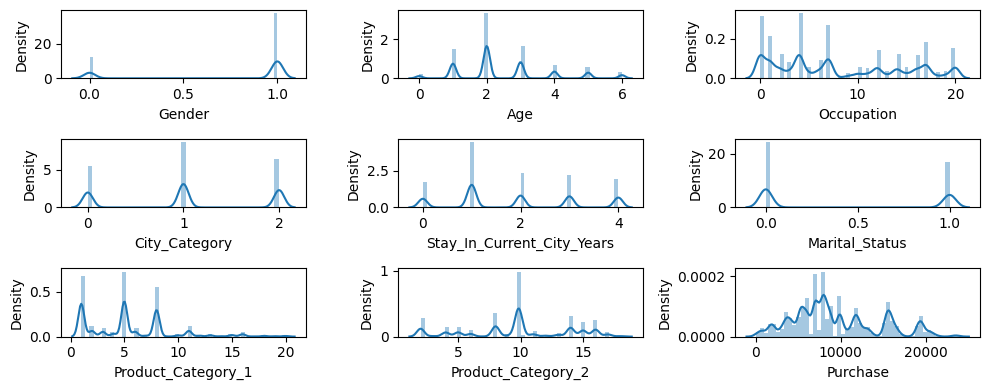

In [ ]:
rows=3
cols=3
fig,ax=plt.subplots(nrows=rows,ncols=cols,figsize=(10,4))
col=df.columns
index=2
for i in range(rows):
  for j in range(cols):
    sns.distplot(df[col[index]],ax=ax[i][j])
    index=index+1
plt.tight_layout()

In [ ]:
df['Purchase']=np.log(df['Purchase'])


In [ ]:
df=pd.get_dummies(df)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,9.032409,True,False,False
1,1000001,0.722139,0,0,10,2,0,1,6.000000,9.629051,True,False,False
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,7.259820,True,False,False
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,6.963190,True,False,False
4,1000002,1.077382,1,6,16,4,0,8,9.842329,8.983314,False,False,True


In [ ]:
cat_cols=['City_Category_0','City_Category_1','City_Category_2']
le=LabelEncoder()
for i in cat_cols:
  df[i]=le.fit_transform(df[i])
df.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64
Purchase,float64


In [ ]:
X=df.drop(labels=['Purchase'],axis=1)
y=df['Purchase']
X.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000001,-1.028774,0,0,10,2,0,3,9.842329,1,0,0
1,1000001,0.722139,0,0,10,2,0,1,6.000000,1,0,0
2,1000001,-0.845799,0,0,10,2,0,12,9.842329,1,0,0
3,1000001,-0.869157,0,0,10,2,0,12,14.000000,1,0,0
4,1000002,1.077382,1,6,16,4,0,8,9.842329,0,0,1


In [ ]:
y.head()

,Purchase
0,9.032409
1,9.629051
2,7.259820
3,6.963190
4,8.983314


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(440054, 12) (110014, 12) (440054,) (110014,)


In [ ]:
scaled=StandardScaler()
X_train=scaled.fit_transform(X_train)
X_test=scaled.fit_transform(X_test)

Machine Learning Model

Linear Regressor

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_predict=model.predict(X_test)

In [ ]:
score=r2_score(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
me=mean_squared_error(y_test,y_predict)
rmse=(np.sqrt(mean_squared_error(y_test,y_predict)))
print('r2_Score: ',score)
print('Mean_absolute_Error: ',mae)
print('Mean_Square_Error: ', me)
print('Root_Mean_Squared_Error: ',rmse)

r2_Score:  0.2016354803764422
Mean_absolute_Error:  0.4555920291165655
Mean_Square_Error:  0.4438001569147334
Root_Mean_Squared_Error:  0.6661832757693137


Decision Tree Regressor

In [ ]:
DT=DecisionTreeRegressor(max_depth=9)
DT.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=9)

In [ ]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [ ]:
rmse_train=(np.sqrt(metrics.mean_squared_error(y_train,train_preds)))
rmse_test=(np.sqrt(metrics.mean_squared_error(y_test,test_preds)))
print('RMSE Training Data= ',str(rmse_train))
print('RMSE Testing Data= ',str(rmse_test))
print('-'*50)
print('R-Squared value on train= ',DT.score(X_train,y_train))
print('R-Squared value on test= ',DT.score(X_test,y_test))

RMSE Training Data=  0.3680408214406252
RMSE Testing Data=  0.3712340778286635
--------------------------------------------------
R-Squared value on train=  0.7519510621944242
R-Squared value on test=  0.752081207239325


Random Forest Regressor

In [ ]:
RF=RandomForestRegressor().fit(X_train,y_train)

In [ ]:
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)

In [ ]:
rmse_train1=(np.sqrt(metrics.mean_squared_error(y_train,train_preds1)))
rmse_test1=(np.sqrt(metrics.mean_squared_error(y_test,test_preds1)))
print('RMSE Training Data= ',str(rmse_train1))
print('RMSE Testing Data= ',str(rmse_test1))
print('-'*50)
print('R-Squared value on train= ',RF.score(X_train,y_train))
print('R-Squared value on test= ',RF.score(X_test,y_test))

RMSE Training Data=  0.13144795781940885
RMSE Testing Data=  0.3700957714831213
--------------------------------------------------
R-Squared value on train=  0.9683587905541589
R-Squared value on test=  0.7535992514525831


In [ ]:
df_test=pd.read_csv('test.csv')

In [ ]:
df_test.shape

(233599, 11)

In [ ]:
df_test.info

<bound method DataFrame.info of         User_ID Product_ID Gender  ... Product_Category_1  Product_Category_2 Product_Category_3
0       1000004  P00128942      M  ...                  1                11.0                NaN
1       1000009  P00113442      M  ...                  3                 5.0                NaN
2       1000010  P00288442      F  ...                  5                14.0                NaN
3       1000010  P00145342      F  ...                  4                 9.0                NaN
4       1000011  P00053842      F  ...                  4                 5.0               12.0
...         ...        ...    ...  ...                ...                 ...                ...
233594  1006036  P00118942      F  ...                  8                 NaN                NaN
233595  1006036  P00254642      F  ...                  5                 8.0                NaN
233596  1006036  P00031842      F  ...                  1                 5.0               12.0
233597  1006037  P00124742      F  ...                 10                16.0                NaN
233598  1006039  P00316642      F  ...                  4                 5.0                NaN

[233599 rows x 11 columns]>

In [ ]:

df_test.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [ ]:
df_test.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category_1,0
Product_Category_2,72344


In [ ]:
df_test['Product_ID']=df_test['Product_ID'].str.replace('P00',"")
ss=StandardScaler()
df_test['Product_ID']=ss.fit_transform(df_test['Product_ID'].values.reshape(-1, 1))

In [ ]:
df_test.drop(['Product_Category_3'],axis=1,inplace=True)

In [ ]:
df_test['Product_Category_2']=df_test['Product_Category_2'].fillna(df_test['Product_Category_2'].mean())

In [ ]:
cat_cols=['Age','Gender','City_Category']
le=LabelEncoder()
for i in cat_cols:
  df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
City_Category,int64
Stay_In_Current_City_Years,object
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64


In [ ]:
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].replace('4+','4')

In [ ]:
df_test['Gender']=df_test['Gender'].astype(int)
df_test['Age']=df_test['Age'].astype(int)
df_test['Stay_In_Current_City_Years']=df_test['Stay_In_Current_City_Years'].astype(int)



In [ ]:
df_test['City_Category']=df_test['City_Category'].astype('category')

In [ ]:
df_test=pd.get_dummies(df_test)
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,False,True,False
1,1000009,-0.587188,1,2,17,0,0,3,5.0,False,False,True
2,1000010,1.133865,0,3,1,4,1,5,14.0,False,True,False
3,1000010,-0.273465,0,3,1,4,1,4,9.0,False,True,False
4,1000011,-1.173330,0,2,1,1,0,4,5.0,False,False,True


In [ ]:
cat_cols=['City_Category_0','City_Category_1','City_Category_2']
le=LabelEncoder()
for i in cat_cols:
  df_test[i]=le.fit_transform(df_test[i])
df_test.dtypes

,0
User_ID,int64
Product_ID,float64
Gender,int64
Age,int64
Occupation,int64
Stay_In_Current_City_Years,int64
Marital_Status,int64
Product_Category_1,int64
Product_Category_2,float64
City_Category_0,int64


In [ ]:
df_test.shape

(233599, 12)

In [ ]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,City_Category_0,City_Category_1,City_Category_2
0,1000004,-0.434752,1,4,7,2,1,1,11.0,0,1,0
1,1000009,-0.587188,1,2,17,0,0,3,5.0,0,0,1
2,1000010,1.133865,0,3,1,4,1,5,14.0,0,1,0
3,1000010,-0.273465,0,3,1,4,1,4,9.0,0,1,0
4,1000011,-1.173330,0,2,1,1,0,4,5.0,0,0,1


In [ ]:
test_preds=RF.predict(df_test)
len(test_preds)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


233599

In [ ]:
id_frame=pd.read_csv('test.csv')


In [ ]:
id_info=id_frame[['User_ID','Product_ID']]
id_info.head()

,User_ID,Product_ID
0,1000004,P00128942
1,1000009,P00113442
2,1000010,P00288442
3,1000010,P00145342
4,1000011,P00053842


In [ ]:
predictions=pd.DataFrame(test_preds,columns=['Purchase'])
predictions['User_ID']=id_info['User_ID']
predictions['Product_ID']=id_info['Product_ID']
predictions.head()

,Purchase,User_ID,Product_ID
0,9.591679,1000004,P00128942
1,9.514858,1000009,P00113442
2,4.551724,1000010,P00288442
3,4.551724,1000010,P00145342
4,4.590012,1000011,P00053842


In [ ]:
predictions.to_csv('BlackFridayPrediction.csv',index=False)